# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
#Type your code here
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv('Dataset_clustering.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
#Type your code here
# Menampilkan informasi tentang dataset, termasuk jumlah baris, kolom, tipe data, dan jumlah nilai non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [4]:
# Kode ini digunakan untuk mengecek jumlah baris dan kolom
df.shape

(2512, 16)

In [5]:
# Kode ini digunakan untuk mengecek apakah ada missing value
df.isna().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [6]:
# Kode ini digunakan untuk mengecek apakah ada data duplikasi
print("Jumlah duplikasi pada dataset : ", df.duplicated().sum())

Jumlah duplikasi pada dataset :  0


In [7]:
#  Kode ini digunakan untuk mengecek parameter statistik
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [8]:
num_col = df.select_dtypes(include='number').columns
num_col

Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance'],
      dtype='object')

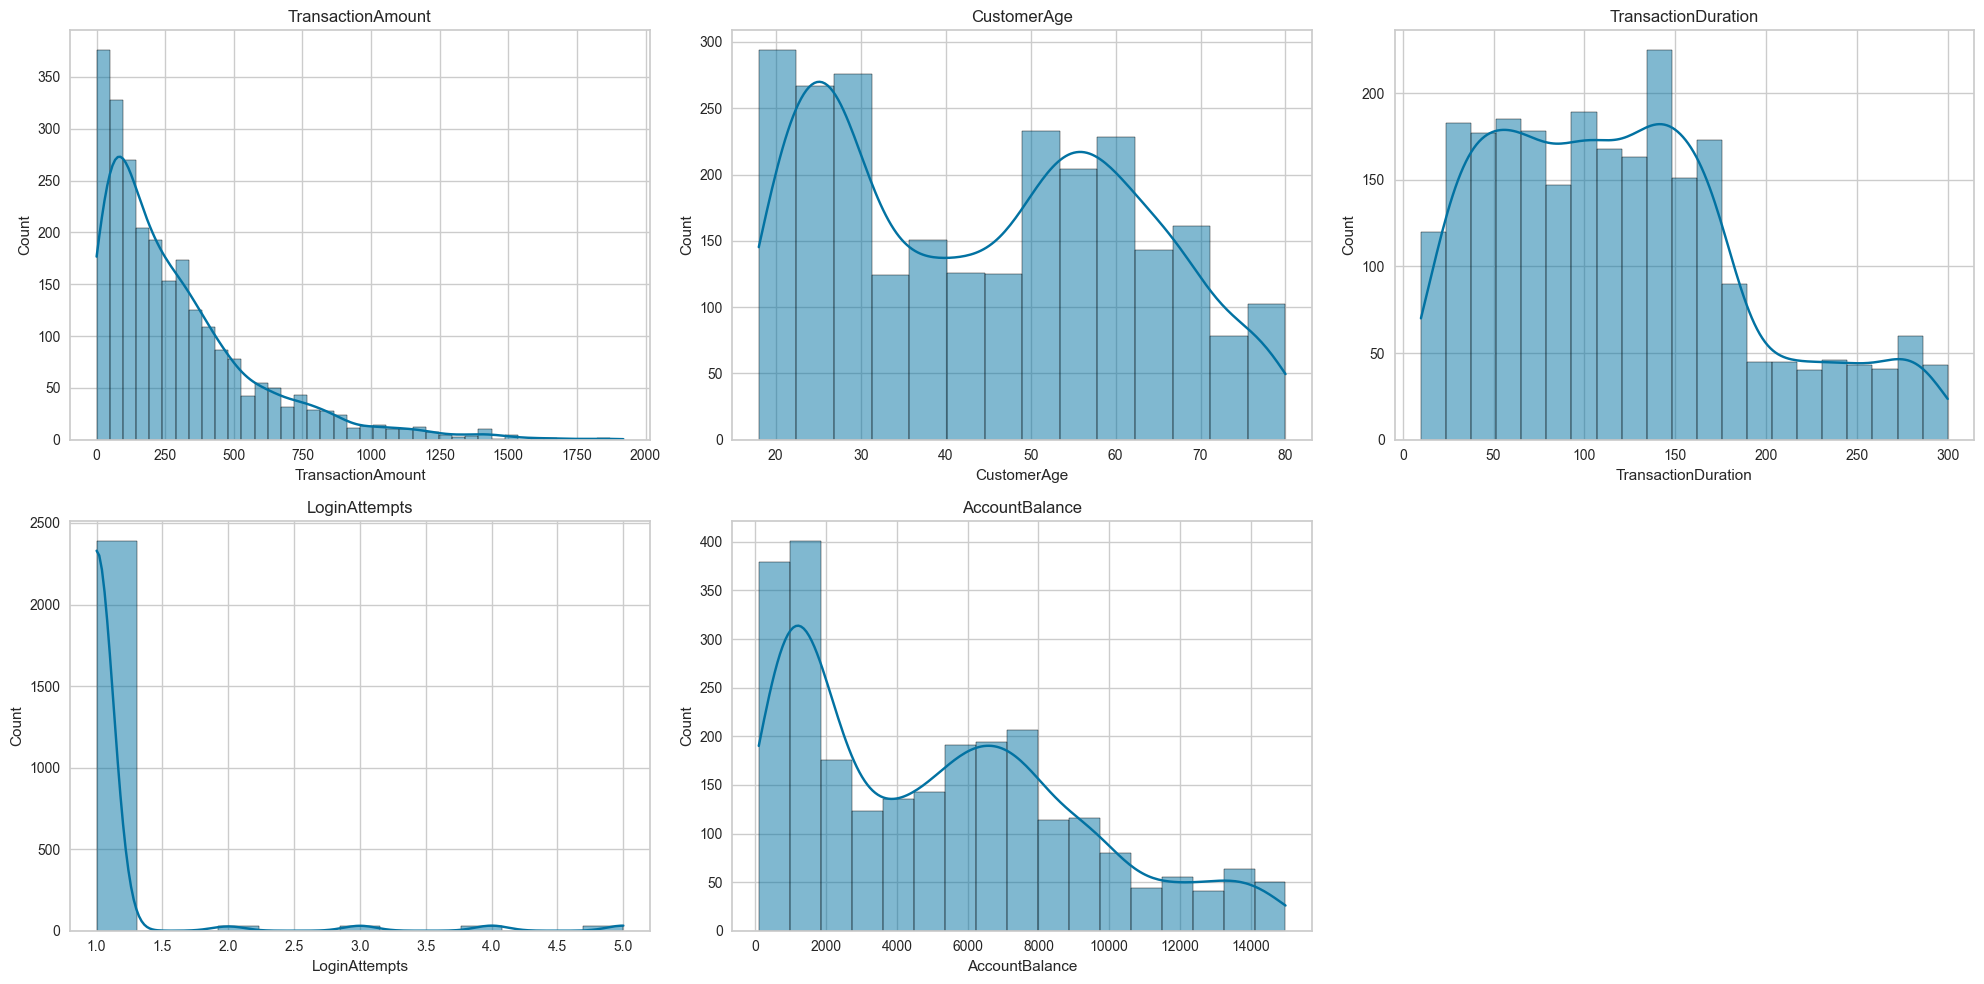

In [9]:
# Membuat histogram untuk melihat distribusi data pada kolom numerik dalam 3 kolom
num_plots = len(num_col)
rows = (num_plots + 2) // 3  # Hitung jumlah baris yang diperlukan
fig, axes = plt.subplots(rows, 3, figsize=(20, 5 * rows))

for idx, col in enumerate(num_col):
    row, col_idx = divmod(idx, 3)
    sns.histplot(df[col], kde=True, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(col)

# Hapus subplot kosong jika ada
for idx in range(num_plots, rows * 3):
    fig.delaxes(axes.flatten()[idx])

plt.tight_layout()
plt.show()

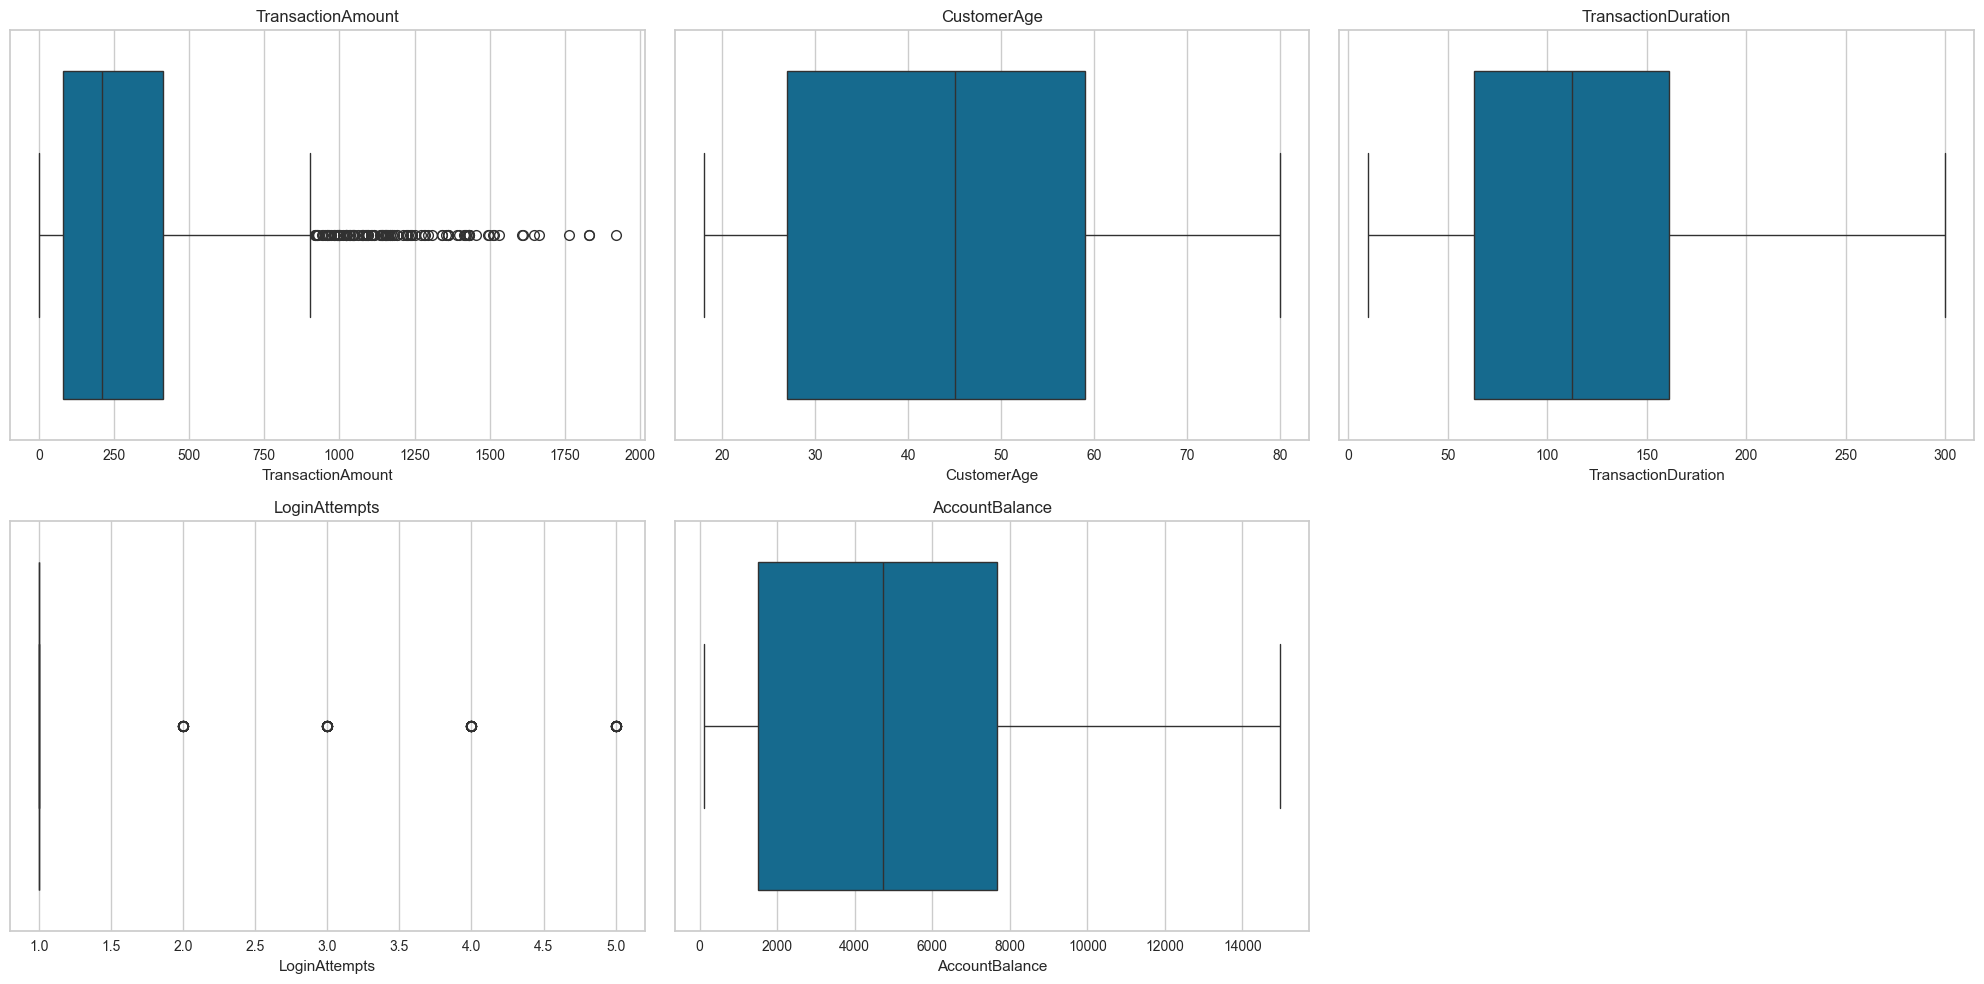

In [10]:
# Menampilkan boxplot untuk melihat distribusi data pada kolom numerik dalam 3 kolom
num_plots = len(num_col)
rows = (num_plots + 2) // 3  # Hitung jumlah baris yang diperlukan
fig, axes = plt.subplots(rows, 3, figsize=(20, 5 * rows))

for idx, col in enumerate(num_col):
    row, col_idx = divmod(idx, 3)
    sns.boxplot(data=df, x=col, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(col)

# Hapus subplot kosong jika ada
for idx in range(num_plots, rows * 3):
    fig.delaxes(axes.flatten()[idx])

plt.tight_layout()
plt.show()

In [11]:
# Menghitung jumlah outlier di setiap kolom numerik
outlier_counts = {}
for col in num_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outlier_counts[col] = outliers

# Menampilkan jumlah outlier di setiap kolom
for col, count in outlier_counts.items():
    percentage = (count / len(df)) * 100
    print(f"Jumlah outlier pada kolom {col}: {count} ({percentage:.2f}%)")

Jumlah outlier pada kolom TransactionAmount: 113 (4.50%)
Jumlah outlier pada kolom CustomerAge: 0 (0.00%)
Jumlah outlier pada kolom TransactionDuration: 0 (0.00%)
Jumlah outlier pada kolom LoginAttempts: 122 (4.86%)
Jumlah outlier pada kolom AccountBalance: 0 (0.00%)


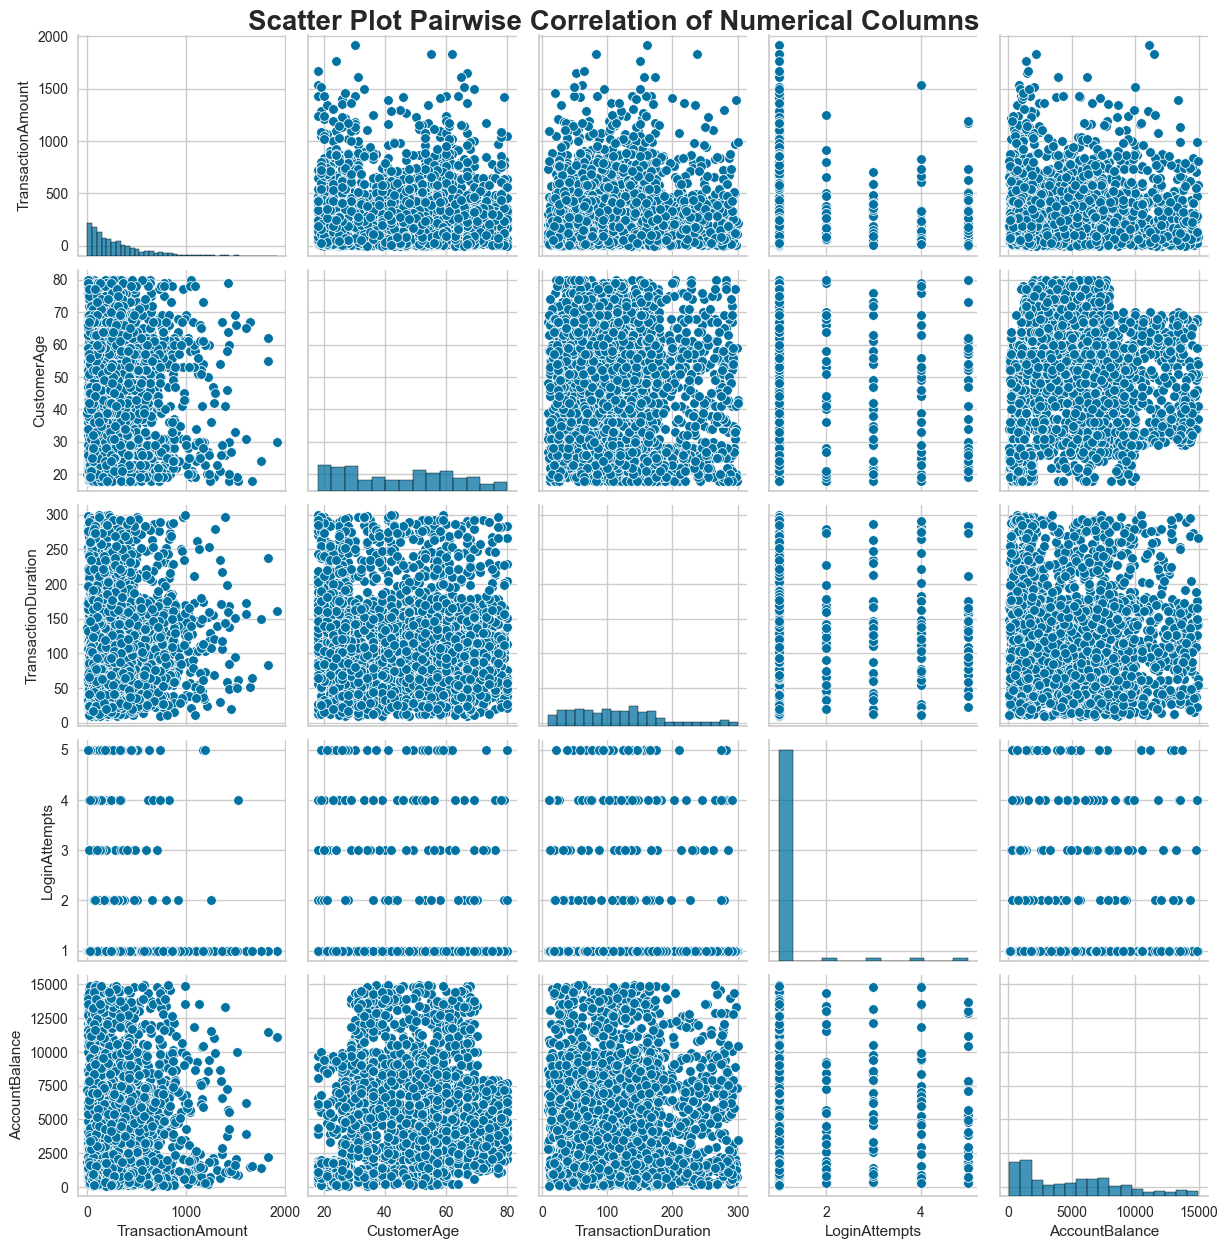

In [12]:
# Visualisasi korelasi antar kolom numerik dengan scatter plot
sns.pairplot(df[num_col])
plt.suptitle('Scatter Plot Pairwise Correlation of Numerical Columns', fontsize=20, fontweight='bold', y=1)
plt.show()

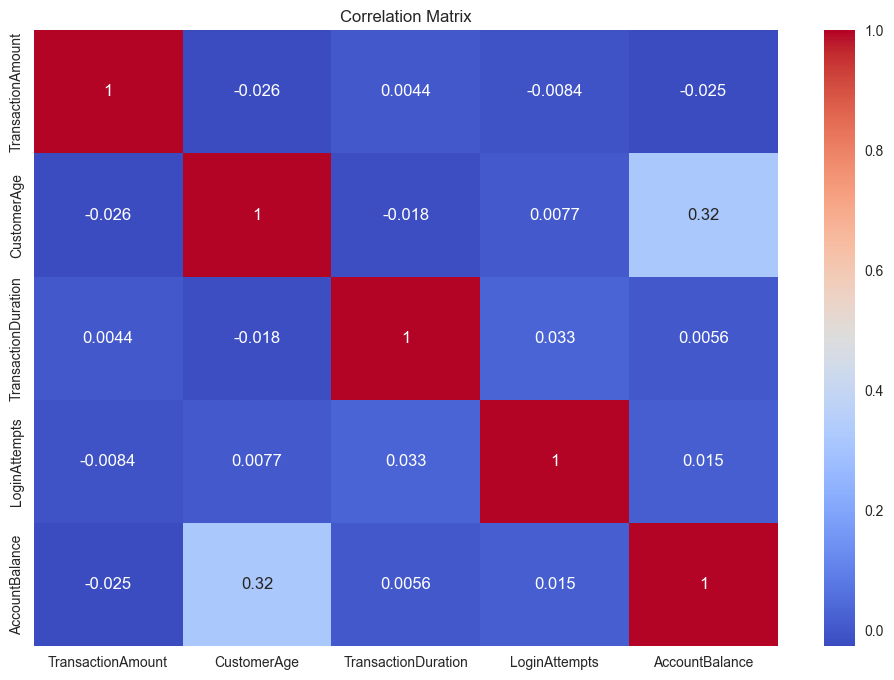

In [13]:
# Visualiasi korelasi antar kolom numerik
plt.figure(figsize=(12,8))
sns.heatmap(df[num_col].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

AgeGroup
Dewasa    1426
Lansia     611
Remaja     475
Name: count, dtype: int64


C:\Users\ANDIK\AppData\Local\Temp\ipykernel_31172\4213582126.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_copy, x='AgeGroup', palette='coolwarm')


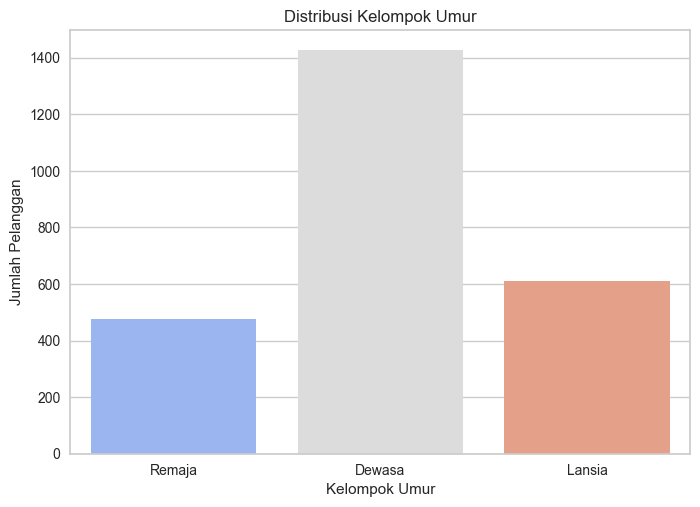

In [ ]:
# Membuat salinan dataset asli
df_copy = df.copy()

# Menambahkan kolom AgeGroup ke salinan dataset
df_copy['AgeGroup'] = pd.cut(df_copy['CustomerAge'], 
                             bins=[0, 25, 59, 100], 
                             labels=['Remaja', 'Dewasa', 'Lansia'])

# Menampilkan distribusi kelompok umur
print(df_copy['AgeGroup'].value_counts())

# Visualisasi distribusi kelompok umur
sns.countplot(data=df_copy, x='AgeGroup', palette='coolwarm')
plt.title("Distribusi Kelompok Umur")
plt.xlabel("Kelompok Umur")
plt.ylabel("Jumlah Pelanggan")
plt.show()

In [15]:
id_col = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID']

In [16]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

df[['TransactionDate', 'PreviousTransactionDate']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionDate          2512 non-null   datetime64[ns]
 1   PreviousTransactionDate  2512 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 39.4 KB


In [17]:
datetime_col = df.select_dtypes(include='datetime64[ns]').columns
datetime_col

Index(['TransactionDate', 'PreviousTransactionDate'], dtype='object')

In [18]:
# Kode ini digunakan untuk menyimpan nilai kategorikal
cat_col = df.select_dtypes(include='object').columns.to_list()
# Menghapus kolom ID dan datetime dari daftar kategorikal
cat_col = [col for col in cat_col if col not in id_col and col not in datetime_col]

cat_col

['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

C:\Users\ANDIK\AppData\Local\Temp\ipykernel_31172\1977107009.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=i, order=df[i].value_counts().index, palette='coolwarm')


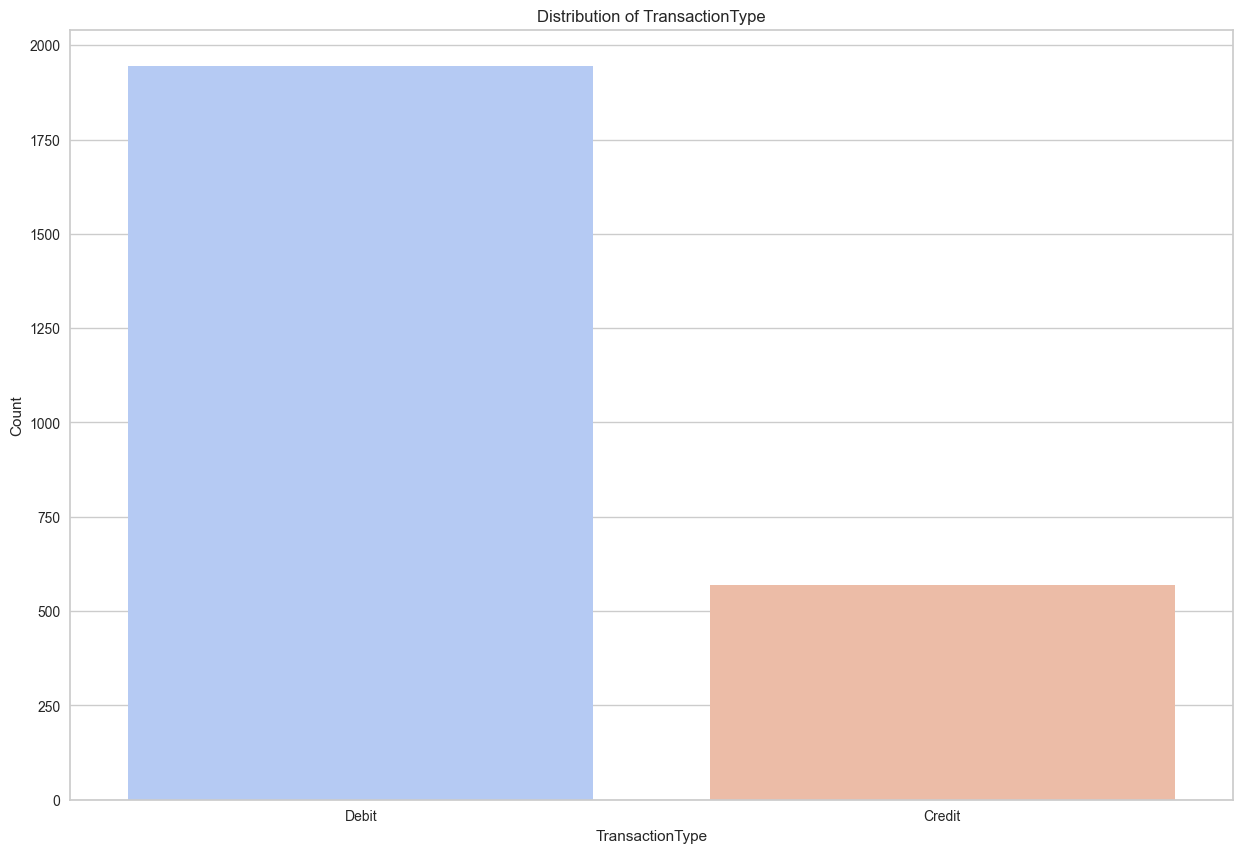

C:\Users\ANDIK\AppData\Local\Temp\ipykernel_31172\1977107009.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=i, order=df[i].value_counts().index, palette='coolwarm')


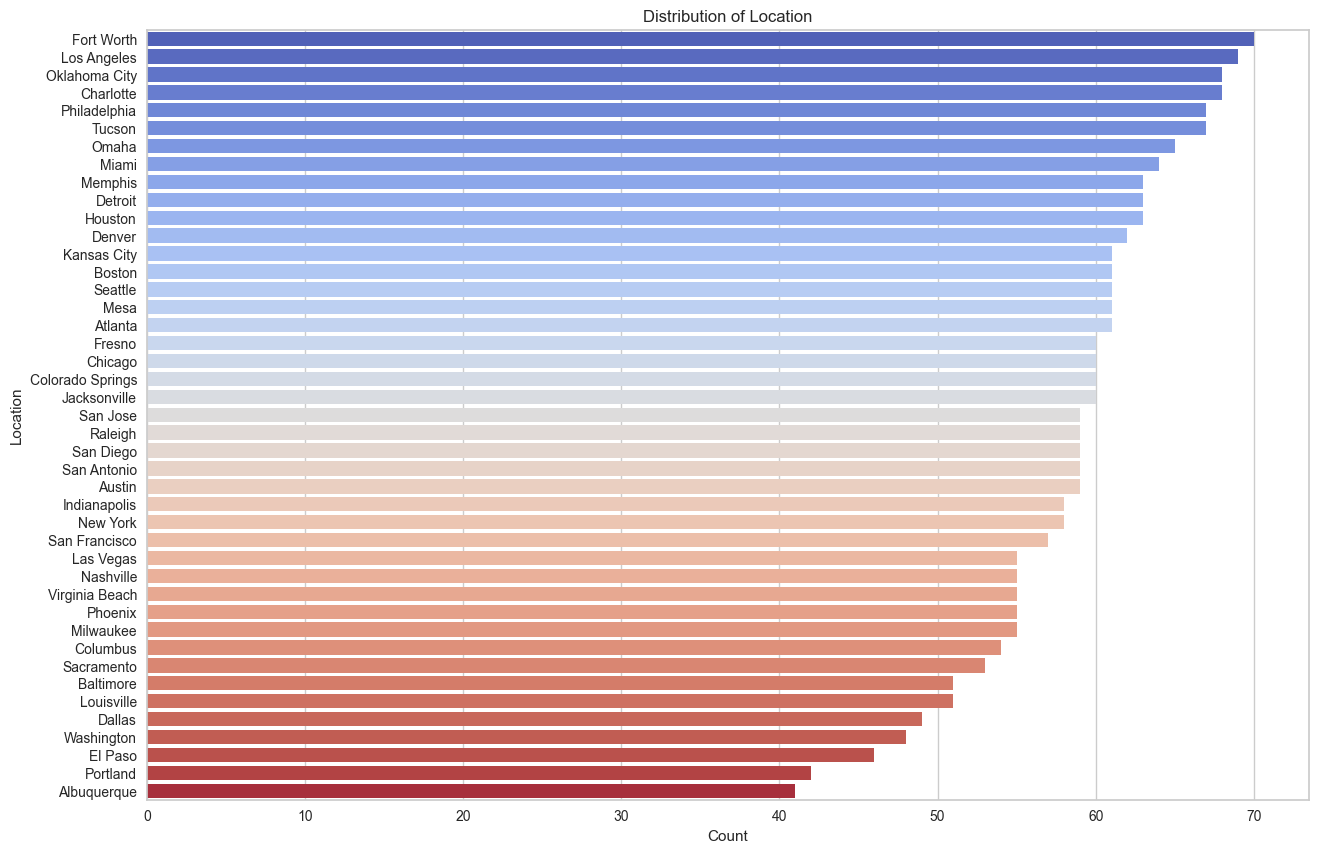

C:\Users\ANDIK\AppData\Local\Temp\ipykernel_31172\1977107009.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=i, order=df[i].value_counts().index, palette='coolwarm')


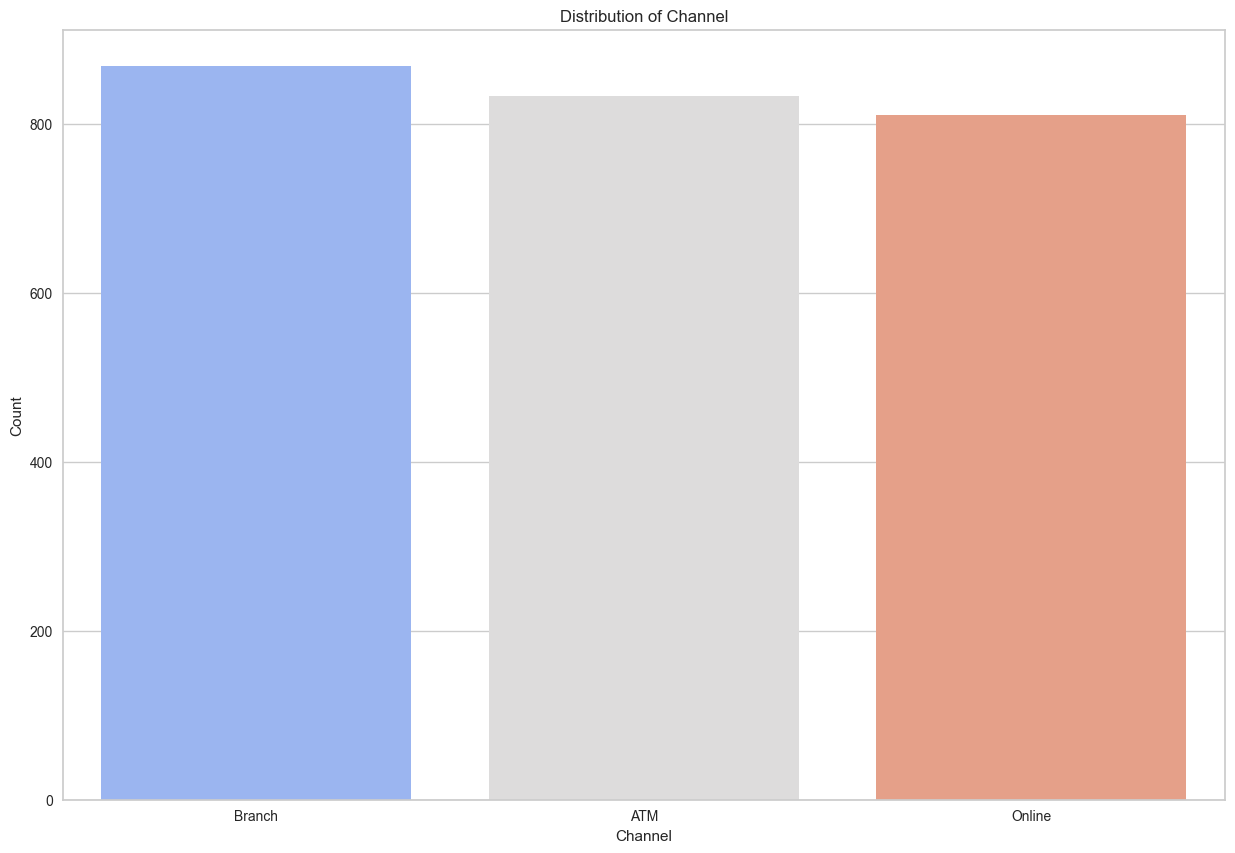

C:\Users\ANDIK\AppData\Local\Temp\ipykernel_31172\1977107009.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=i, order=df[i].value_counts().index, palette='coolwarm')


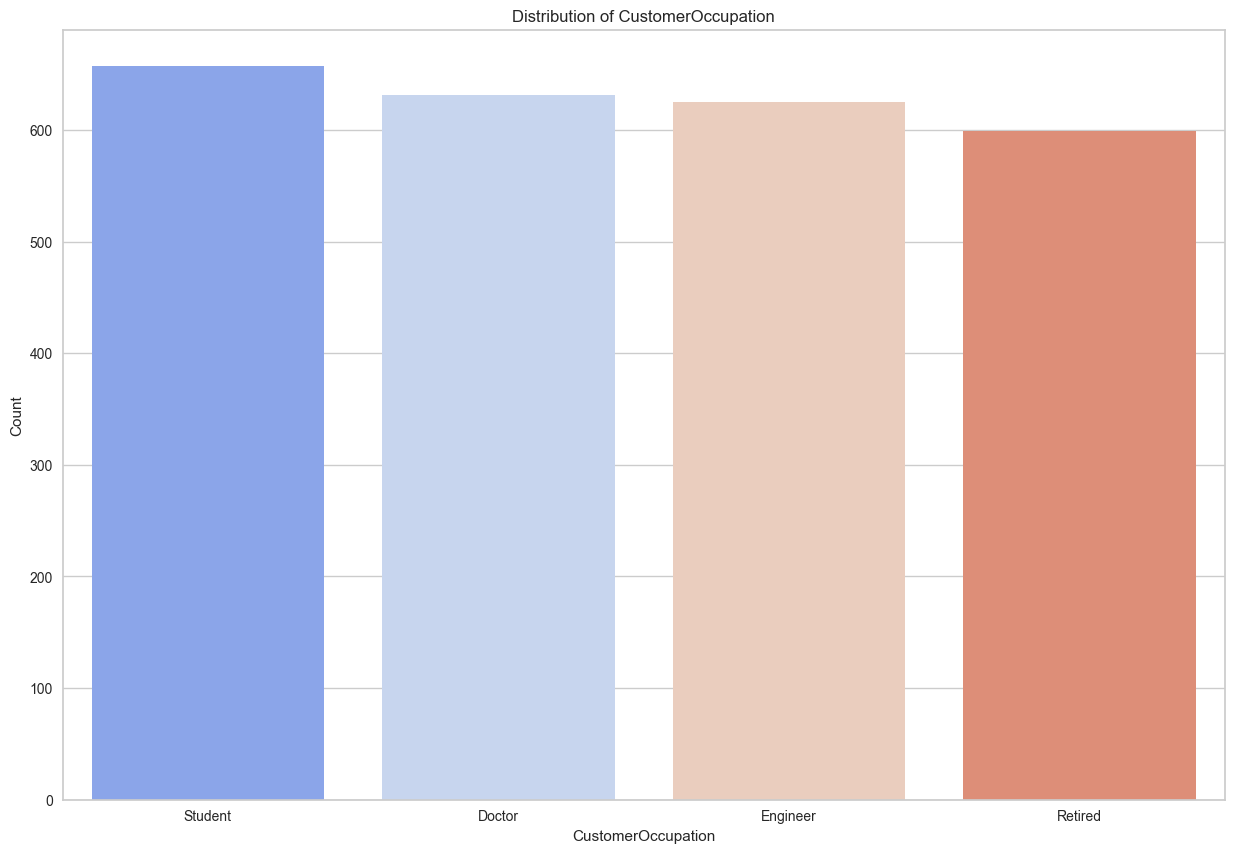

In [19]:
# Visualisasi distribusi data pada kolom kategorik dengan bar plot
for i in cat_col:
    if i == 'Location':
        plt.figure(figsize=(15, 10))
        sns.countplot(data=df, y=i, order=df[i].value_counts().index, palette='coolwarm')
        plt.title(f'Distribution of {i}')
        plt.xlabel('Count')
        plt.ylabel(i)
        plt.show()
    else:
        plt.figure(figsize=(15, 10))
        sns.countplot(data=df, x=i, order=df[i].value_counts().index, palette='coolwarm')
        plt.title(f'Distribution of {i}')
        plt.xlabel(i)
        plt.ylabel('Count')
        plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [21]:
# Membuat dataframe baru dengan menghapus kolom datetime dan ID
df_origin = df.drop(columns=id_col + list(datetime_col))

# Menampilkan beberapa baris awal dataframe baru
df_origin.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,Debit,San Diego,ATM,70,Doctor,81,1,5112.21
1,376.24,Debit,Houston,ATM,68,Doctor,141,1,13758.91
2,126.29,Debit,Mesa,Online,19,Student,56,1,1122.35
3,184.50,Debit,Raleigh,Online,26,Student,25,1,8569.06
4,13.45,Credit,Atlanta,Online,26,Student,198,1,7429.40


In [22]:
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2512 non-null   float64
 1   TransactionType      2512 non-null   object 
 2   Location             2512 non-null   object 
 3   Channel              2512 non-null   object 
 4   CustomerAge          2512 non-null   int64  
 5   CustomerOccupation   2512 non-null   object 
 6   TransactionDuration  2512 non-null   int64  
 7   LoginAttempts        2512 non-null   int64  
 8   AccountBalance       2512 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 176.8+ KB


In [23]:
df_origin['CustomerAge'] = pd.cut(df_origin['CustomerAge'],
                                        bins=[0, 25, 59, 100], 
                                        labels=['Remaja', 'Dewasa', 'Lansia'])

print(df_origin['CustomerAge'].value_counts())
df_origin['CustomerAge'] = df_origin['CustomerAge'].astype('object')
df_origin.head()

CustomerAge
Dewasa    1426
Lansia     611
Remaja     475
Name: count, dtype: int64


,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,Debit,San Diego,ATM,Lansia,Doctor,81,1,5112.21
1,376.24,Debit,Houston,ATM,Lansia,Doctor,141,1,13758.91
2,126.29,Debit,Mesa,Online,Remaja,Student,56,1,1122.35
3,184.50,Debit,Raleigh,Online,Dewasa,Student,25,1,8569.06
4,13.45,Credit,Atlanta,Online,Dewasa,Student,198,1,7429.40


In [24]:
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2512 non-null   float64
 1   TransactionType      2512 non-null   object 
 2   Location             2512 non-null   object 
 3   Channel              2512 non-null   object 
 4   CustomerAge          2512 non-null   object 
 5   CustomerOccupation   2512 non-null   object 
 6   TransactionDuration  2512 non-null   int64  
 7   LoginAttempts        2512 non-null   int64  
 8   AccountBalance       2512 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 176.8+ KB


In [25]:
df_preprocessed = df_origin.copy()
df_preprocessed.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,Debit,San Diego,ATM,Lansia,Doctor,81,1,5112.21
1,376.24,Debit,Houston,ATM,Lansia,Doctor,141,1,13758.91
2,126.29,Debit,Mesa,Online,Remaja,Student,56,1,1122.35
3,184.50,Debit,Raleigh,Online,Dewasa,Student,25,1,8569.06
4,13.45,Credit,Atlanta,Online,Dewasa,Student,198,1,7429.40


In [26]:
num_col = num_col.drop('CustomerAge')
num_col

Index(['TransactionAmount', 'TransactionDuration', 'LoginAttempts',
       'AccountBalance'],
      dtype='object')

In [27]:
# Menggunakan MinMaxScaler
scaler = MinMaxScaler()
df_preprocessed[num_col] = scaler.fit_transform(df_preprocessed[num_col])
df_preprocessed.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,Debit,San Diego,ATM,Lansia,Doctor,0.244828,0.0,0.336832
1,0.195940,Debit,Houston,ATM,Lansia,Doctor,0.451724,0.0,0.918055
2,0.065680,Debit,Mesa,Online,Remaja,Student,0.158621,0.0,0.068637
3,0.096016,Debit,Raleigh,Online,Dewasa,Student,0.051724,0.0,0.569198
4,0.006874,Credit,Atlanta,Online,Dewasa,Student,0.648276,0.0,0.492591


In [28]:
df_preprocessed = pd.get_dummies(df_preprocessed, columns=['TransactionType'], drop_first=True)


In [29]:
df_preprocessed.head()

,TransactionAmount,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Debit
0,0.007207,San Diego,ATM,Lansia,Doctor,0.244828,0.0,0.336832,True
1,0.195940,Houston,ATM,Lansia,Doctor,0.451724,0.0,0.918055,True
2,0.065680,Mesa,Online,Remaja,Student,0.158621,0.0,0.068637,True
3,0.096016,Raleigh,Online,Dewasa,Student,0.051724,0.0,0.569198,True
4,0.006874,Atlanta,Online,Dewasa,Student,0.648276,0.0,0.492591,False


In [30]:
cat_col.append('CustomerAge')
cat_col.remove('TransactionType')
cat_col

['Location', 'Channel', 'CustomerOccupation', 'CustomerAge']

In [31]:
# Count encoding untuk kolom kategorikal
for col in cat_col:
    count_map = df_preprocessed[col].value_counts().to_dict()
    df_preprocessed[col] = df_preprocessed[col].map(count_map)

df_preprocessed.head()

,TransactionAmount,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Debit
0,0.007207,59,833,611,631,0.244828,0.0,0.336832,True
1,0.195940,63,833,611,631,0.451724,0.0,0.918055,True
2,0.065680,61,811,475,657,0.158621,0.0,0.068637,True
3,0.096016,59,811,1426,657,0.051724,0.0,0.569198,True
4,0.006874,61,811,1426,657,0.648276,0.0,0.492591,False


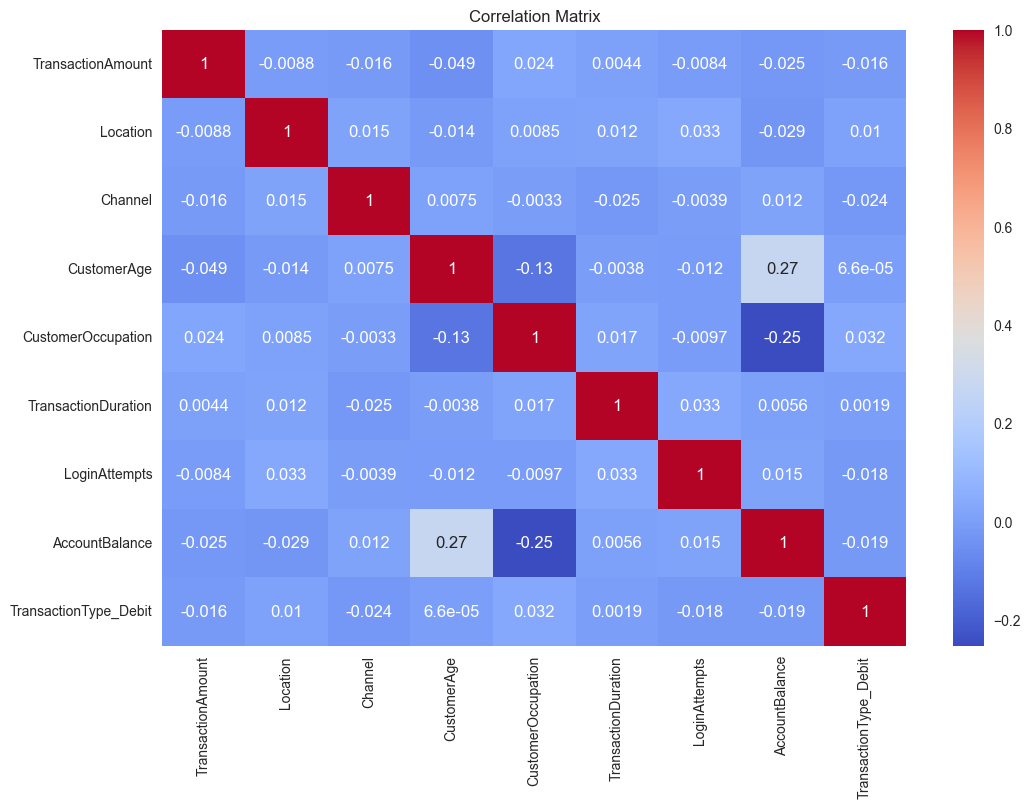

In [32]:
# Visualiasi korelasi antar kolom numerik
plt.figure(figsize=(12,8))
sns.heatmap(df_preprocessed.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Di tahap ini kita melakukan binning terhadap kolom `CustomerAge` dengan label remaja, dewasa, dan lansia. Setelah itu kita akan menormalisasikan fitur dengan tipe numerik menggunakan MinMaxScaler dan juga mengubah atau encoding terhadap fitur kategorikal dengan count encoding karena dilihat dari karakteristik data tersebut. Khusus untuk `TransactionType` kita menggunakan One-Hot Encoding dikarenakan distribusi datanya tidak merata.

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [33]:
# Menentukan jumlah cluster
kmeans = KMeans(n_clusters=2, random_state=42)

# Melatih model K-Means
kmeans.fit(df_preprocessed)

KMeans(n_clusters=2, random_state=42)

Kita akan menggunakan algoritma K-Means dengan 2 cluster yang bertujuan untuk membentuk label fraud dan non-fraud

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [34]:
# Menghitung Silhouette Score
silhouette_kmeans = silhouette_score(df_preprocessed, kmeans.labels_)
print(f"Silhouette Score untuk model K-Means: {silhouette_kmeans:.4f}")

# Type your code here
# Menambahkan label cluster ke dataframe
df_preprocessed['Cluster_KMeans'] = kmeans.labels_

# Menampilkan jumlah data di setiap cluster
print(df_preprocessed['Cluster_KMeans'].value_counts())

Silhouette Score untuk model K-Means: 0.9322
Cluster_KMeans
0    1426
1    1086
Name: count, dtype: int64


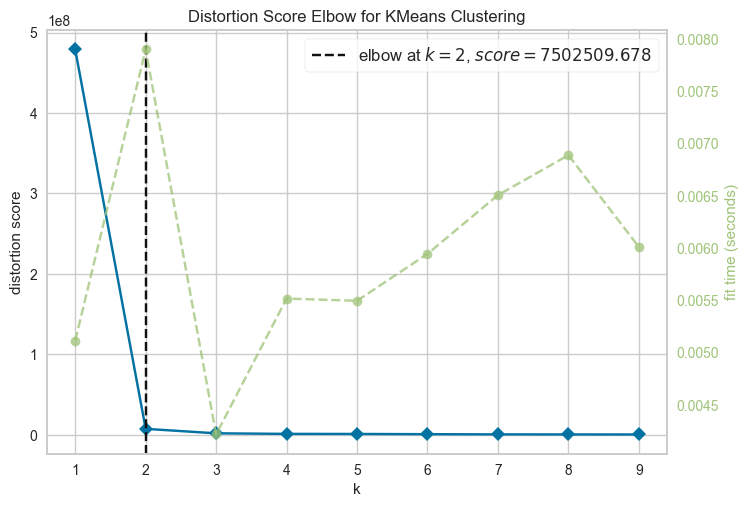

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
 
# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(df_preprocessed)
 
# Menampilkan grafik elbow untuk analisis
visualizer.show()

## **c. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

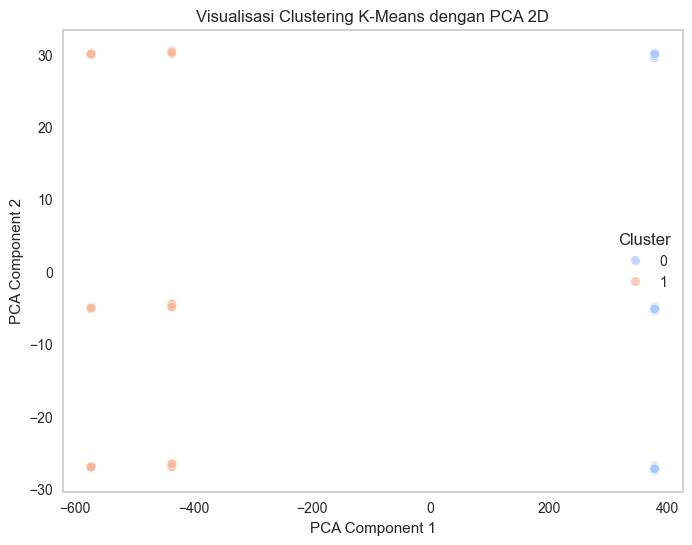

In [36]:
# Reduksi dimensi ke 2D menggunakan PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_preprocessed.drop(columns=['Cluster_KMeans']))  # Hapus label cluster sebelum PCA

# Scatter plot hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_preprocessed['Cluster_KMeans'], palette="coolwarm", alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Visualisasi Clustering K-Means dengan PCA 2D")
plt.legend(title="Cluster")
plt.grid()
plt.show()


## **d. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [37]:
df_origin.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,Debit,San Diego,ATM,Lansia,Doctor,81,1,5112.21
1,376.24,Debit,Houston,ATM,Lansia,Doctor,141,1,13758.91
2,126.29,Debit,Mesa,Online,Remaja,Student,56,1,1122.35
3,184.50,Debit,Raleigh,Online,Dewasa,Student,25,1,8569.06
4,13.45,Credit,Atlanta,Online,Dewasa,Student,198,1,7429.40


In [38]:
df_inverse = df_preprocessed.copy()
df_inverse.head()

,TransactionAmount,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Debit,Cluster_KMeans
0,0.007207,59,833,611,631,0.244828,0.0,0.336832,True,1
1,0.195940,63,833,611,631,0.451724,0.0,0.918055,True,1
2,0.065680,61,811,475,657,0.158621,0.0,0.068637,True,1
3,0.096016,59,811,1426,657,0.051724,0.0,0.569198,True,0
4,0.006874,61,811,1426,657,0.648276,0.0,0.492591,False,0


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [39]:
# Type your code here
# Inverse transform untuk data numerik yang dinormalisasi
df_inverse[num_col] = scaler.inverse_transform(df_inverse[num_col])

# Menampilkan hasil setelah inverse transform
df_inverse.head()

,TransactionAmount,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Debit,Cluster_KMeans
0,14.09,59,833,611,631,81.0,1.0,5112.21,True,1
1,376.24,63,833,611,631,141.0,1.0,13758.91,True,1
2,126.29,61,811,475,657,56.0,1.0,1122.35,True,1
3,184.50,59,811,1426,657,25.0,1.0,8569.06,True,0
4,13.45,61,811,1426,657,198.0,1.0,7429.40,False,0


In [ ]:
def inverse_count_encoding(df_inverse, df_origin, cat_col):
    df_decoded = df_inverse.copy()
    
    for col in cat_col:
        # Buat mapping dari count encoding ke kategori asli
        count_map = df_origin[col].value_counts().to_dict()
        inverse_map = {v: k for k, v in count_map.items()}  # Balik mapping
        
        # Lakukan inverse encoding
        df_decoded[col] = df_inverse[col].map(inverse_map)
    
    return df_decoded

# Contoh penggunaan
df_decoded = inverse_count_encoding(df_inverse, df_origin, cat_col)
df_decoded.head()


,TransactionAmount,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Debit,Cluster_KMeans
0,14.09,Austin,ATM,Lansia,Doctor,81.0,1.0,5112.21,True,1
1,376.24,Houston,ATM,Lansia,Doctor,141.0,1.0,13758.91,True,1
2,126.29,Atlanta,Online,Remaja,Student,56.0,1.0,1122.35,True,1
3,184.50,Austin,Online,Dewasa,Student,25.0,1.0,8569.06,True,0
4,13.45,Atlanta,Online,Dewasa,Student,198.0,1.0,7429.40,False,0


In [41]:
df_decoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TransactionAmount      2512 non-null   float64
 1   Location               2512 non-null   object 
 2   Channel                2512 non-null   object 
 3   CustomerAge            2512 non-null   object 
 4   CustomerOccupation     2512 non-null   object 
 5   TransactionDuration    2512 non-null   float64
 6   LoginAttempts          2512 non-null   float64
 7   AccountBalance         2512 non-null   float64
 8   TransactionType_Debit  2512 non-null   bool   
 9   Cluster_KMeans         2512 non-null   int32  
dtypes: bool(1), float64(4), int32(1), object(4)
memory usage: 169.4+ KB


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [42]:
# Type your code here
import pandas as pd

def analyze_clusters(df, num_col, cat_col):
    # Inisialisasi dictionary untuk menyimpan hasil analisis
    cluster_analysis = {}

    # Iterasi untuk setiap cluster
    for cluster in df['Cluster_KMeans'].unique():
        cluster_data = df[df['Cluster_KMeans'] == cluster]
        
        # Ambil rata-rata untuk kolom numerik
        num_avg = cluster_data[num_col].mean().to_dict()
        
        # Ambil nilai yang paling sering muncul (modus) untuk kolom kategorikal
        cat_mode = {}
        for col in cat_col:
            if not cluster_data[col].empty:
                mode_values = cluster_data[col].mode()
                cat_mode[col] = mode_values.iloc[0] if not mode_values.empty else None
        
        # Pastikan memproses 'TransactionType_Debit' hanya jika ada di dataframe
        if 'TransactionType_Debit' in df.columns:
            mode_values = cluster_data['TransactionType_Debit'].mode()
            if not mode_values.empty:
                transaction_type_mode = mode_values.iloc[0]  # Ambil nilai modus pertama
                cat_mode['TransactionType_Debit'] = 'Debit' if transaction_type_mode else 'Credit'
        
        # Gabungkan hasil analisis
        cluster_analysis[cluster] = {**num_avg, **cat_mode}
    
    # Konversi hasil analisis ke DataFrame
    return pd.DataFrame(cluster_analysis).T

# Contoh penggunaan fungsi
analyze_clusters(df_decoded, num_col, cat_col)


,TransactionAmount,TransactionDuration,LoginAttempts,AccountBalance,Location,Channel,CustomerOccupation,CustomerAge,TransactionType_Debit
1,313.986326,119.726519,1.132597,4056.80233,Atlanta,ATM,Student,Lansia,Debit
0,285.109691,119.579944,1.118513,5919.6646,Milwaukee,Branch,Engineer,Dewasa,Debit


# Analisis Karakteristik Cluster dari Model KMeans  
Hasil interpretasi dari clustering menggunakan K-Means
## Cluster 1:
- Rata - Rata Transaction Amount: 313.98
- Rata - rata Transaction Duration: 119.72
- Rata - rata Login Attempts: 1.13
- Rata - Rata Account Balance: 4056.80
- Nilai yang sering muncul Location: Atlanta
- Nilai yang sering muncul Channel: ATM
- Nilai yang sering muncul Customer Occupation: Student
- Nilai yang sering muncul Customer Age : Lansia
- Nilai yang sering muncul Transaction Type: Debit
- Analisis: Cluster ini mencakup pelanggan dengan login ke aplikasi bank sebanyak 1 kali untuk melakukan transaksi dan rata - rata mereka mengeluarkan sebanyak 313.98 dengan durasi rata - rata 119.72 dan memiliki rata - rata saldo di akun 4056.80. Pelanggan ini kebanyakan berasal dari Atlanta dengan kebiasaan menggunakan ATM sebagai transaksinya. Adapun kebanyakan penggunanya merupakan siswa dan orang dengan usia lansia (rentang usia 60 - 100) menggunakan kartu debit sebagai transaksinya. Ckuster ini menandakan adanya fraud karena terdapat anomali dari pengguna siswa dengan usia lansia serta kegiatan login terlihat lebih besar dari cluster 0.
## Cluster 0:
- Rata - Rata Transaction Amount: 285.10
- Rata - rata Transaction Duration: 119.57
- Rata - rata Login Attempts: 1.11
- Rata - Rata Account Balance: 5919.66
- Nilai yang sering muncul Location: Milwaukee
- Nilai yang sering muncul Channel: Branch
- Nilai yang sering muncul Customer Occupation: Engineer
- Nilai yang sering muncul Customer Age : Dewasa
- Nilai yang sering muncul Transaction Type: Debit
- Analisis: Cluster ini mencakup pelanggan dengan login ke aplikasi bank sebanyak 1 kali untuk melakukan transaksi dan rata - rata mereka mengeluarkan sebanyak 285.10 dengan durasi rata - rata 119.57 dan memiliki rata - rata saldo di akun 5919.66. Pelanggan ini kebanyakan berasal dari Milwaukee dengan kebiasaan menggunakan Branch sebagai transaksinya. Adapun kebanyakan penggunanya merupakan Engineer dan orang dengan usia Dewasa (rentang usia 26 - 59) menggunakan kartu debit sebagai transaksinya. Cluster ini menandakan tidak adanya fraud karena untuk loginnya dia lebih kecil dari cluster 1 dan tidak terdapat anomali untuk customer occupation dan customer age.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [43]:
df_preprocessed.to_csv('Dataset_klasifikasi.csv', index=False)